In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('/content/emails (1).csv')

In [36]:
x=df.drop(['Email No.','Prediction'], axis=1)
y=df['Prediction']

In [37]:
x.shape

(4299, 3000)

In [38]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [39]:
set(x.dtypes)

{dtype('int64')}

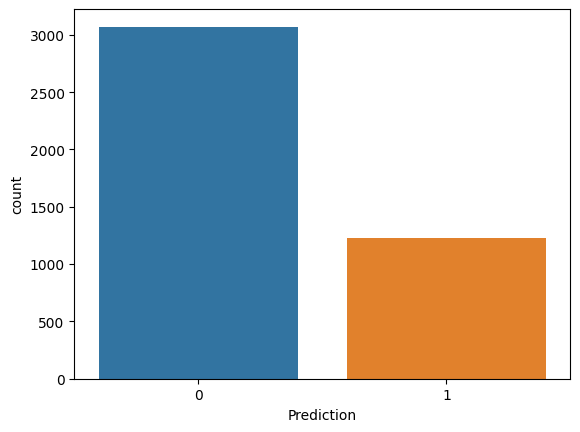

In [40]:
sns.countplot(x=y);

In [41]:
y.value_counts()

0    3071
1    1228
Name: Prediction, dtype: int64

In [42]:
#feature scaling-this is the first requirement for svm and knearest algorithm, scale between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [43]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03809524, 0.12121212, 0.01749271, ..., 0.        , 0.01754386,
        0.        ],
       [0.0047619 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01428571, 0.08333333, 0.0058309 , ..., 0.        , 0.01754386,
        0.        ]])

In [45]:
#cross validation data splitting
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [46]:
x_scaled.shape

(4299, 3000)

In [48]:
x_train.shape

(3224, 3000)

In [49]:
x_test.shape

(1075, 3000)

In [50]:
#knearest algorithm, import the class
from sklearn.neighbors import KNeighborsClassifier

In [51]:
#create object
knn = KNeighborsClassifier(n_neighbors=5)#k5 is value of parameter k

In [52]:
#train algo
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
#prediction ghenar,i.e pass test data,model will predict
y_pred=knn.predict(x_test)

In [54]:
#import all metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

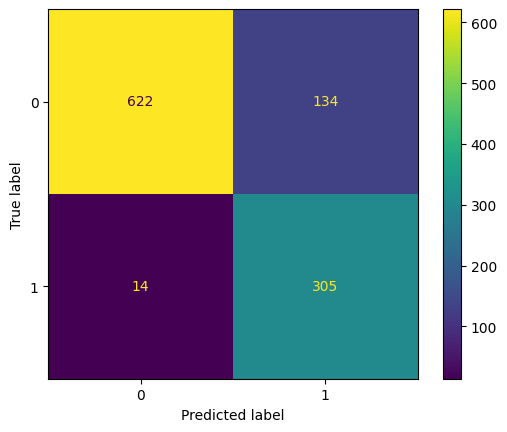

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [56]:
y_test.value_counts()

0    756
1    319
Name: Prediction, dtype: int64

In [57]:
accuracy_score(y_test, y_pred)#accurately predicted

0.8623255813953489

In [58]:
classification_report(y_test, y_pred)#here recall(should be >than 80% thus algo effective) is accuracy for each class and precision is accurcy of prediction

'              precision    recall  f1-score   support\n\n           0       0.98      0.82      0.89       756\n           1       0.69      0.96      0.80       319\n\n    accuracy                           0.86      1075\n   macro avg       0.84      0.89      0.85      1075\nweighted avg       0.89      0.86      0.87      1075\n'

In [63]:
#if we take many k values then we will take the k value which has minimum error(difference)between actual val and predicted value
error=[]
for k in range(1,41):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  pred=knn.predict(x_test)
  error.append(np.mean(pred!=y_test))

In [64]:
error

[0.09488372093023256,
 0.09395348837209302,
 0.1144186046511628,
 0.10604651162790697,
 0.13767441860465116,
 0.1330232558139535,
 0.14790697674418604,
 0.14325581395348838,
 0.16930232558139535,
 0.17116279069767443,
 0.20186046511627906,
 0.20186046511627906,
 0.2158139534883721,
 0.21674418604651163,
 0.23348837209302326,
 0.23162790697674418,
 0.2474418604651163,
 0.24558139534883722,
 0.25953488372093025,
 0.25953488372093025,
 0.26790697674418606,
 0.2688372093023256,
 0.27813953488372095,
 0.2772093023255814,
 0.28930232558139535,
 0.28651162790697676,
 0.30697674418604654,
 0.29953488372093023,
 0.30790697674418605,
 0.3032558139534884,
 0.3116279069767442,
 0.3116279069767442,
 0.31813953488372093,
 0.31627906976744186,
 0.31906976744186044,
 0.3144186046511628,
 0.3218604651162791,
 0.31813953488372093,
 0.32,
 0.3172093023255814]

In [65]:
knn=KNeighborsClassifier(n_neighbors=1)

In [66]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
y_pred=knn.predict(x_test)

In [68]:
accuracy_score(y_test, y_pred)

0.9051162790697674

In [69]:
from sklearn.svm import SVC

In [70]:
svm=SVC(kernel='linear')

In [71]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [72]:
y_pred=svm.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred)

0.9804651162790697

In [79]:
#linear =0.9804651162790697,rbf=0.9376744186046512,poly,sigmoid
svm=SVC(kernel='rbf')

In [80]:
svm.fit(x_train, y_train)

SVC()

In [81]:
y_pred=svm.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred)

0.9376744186046512

In [ ]:
#svm gives more accuracy than knearest thus this is the most effective model for this email spam classification